<a href="https://colab.research.google.com/github/janeeeeverdad/CSST106-4B/blob/main/EXERCISE1_ImageProcessingTechniques_VERDAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSST 106
**Verdad, Jane Benneth Dione**

**BSCS-4B**

**September 09, 2024**


**1. Install OpenCV**

In [1]:
!pip install opencv-python-headless

**2. Import Libraries**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image (img, title="Image"):
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.axis('off')
  plt.show()

def display_images (img1, img2, title1="Image 1", title2="Image2 "):
  plt.subplot(1,2,1)
  plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
  plt.title(title1)
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
  plt.title(title2)
  plt.axis('off')

  plt.show()

3. Load Image

Saving Verdad.jpg to Verdad.jpg


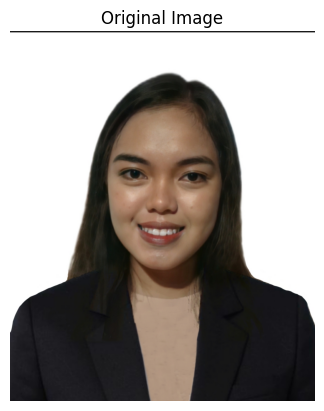

In [3]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()

image_path = next(iter(uploaded))
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image),cv2.COLOR_BGR2RGB)

display_image(image, "Original Image")

**Exercise 1: Scaling and Rotation**

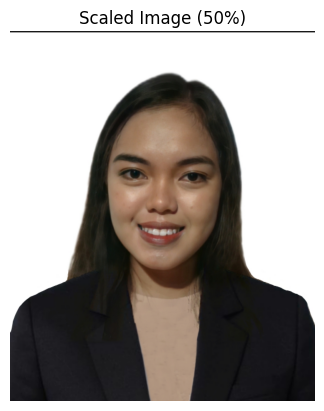

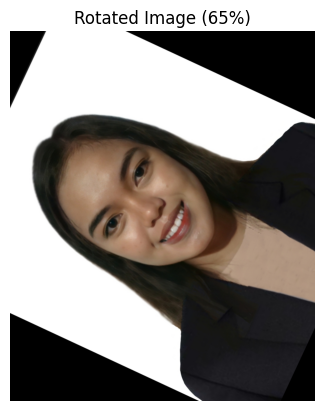

In [25]:
def scale_image(image, scale_factor):
  height, width = image.shape[:2]
  scale_image = cv2.resize(image, (int(width * scale_factor), int(height * scale_factor)), interpolation=cv2.INTER_LINEAR)
  return scale_image

def rotate_image(image, angle):
  height, width = image.shape[:2]
  center = (width // 2, height //2)
  matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated_image = cv2.warpAffine (image, matrix, (width, height))
  return rotated_image

scaled_image = scale_image(image, 0.5)
display_image(scaled_image, "Scaled Image (50%)")

rotated_image = rotate_image(image, 65)
display_image(rotated_image, "Rotated Image (65%)")



**Exercise 2: Blurring Techniques**

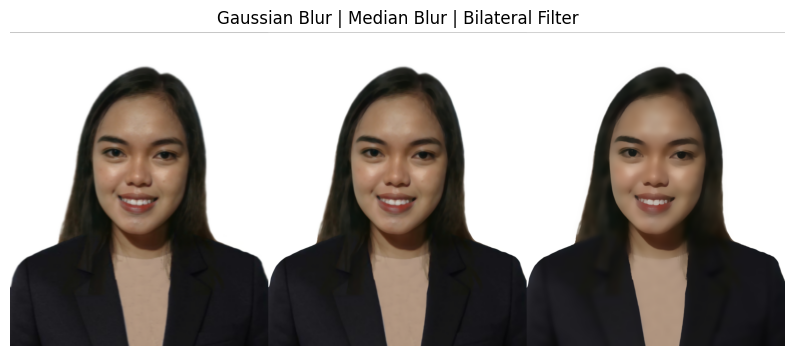

In [26]:
gaussian_blur = cv2.GaussianBlur(image, (15,5),0)
#display_image(gaussian_blur, "Gaussian Blur")

median_blur = cv2.medianBlur(image,9)
#display_image(median_blur, "Median Blur")

bilateral_filter = cv2.bilateralFilter(image, 30, 60, 90)
#display_image(bilateral_filter, "Bilateral Filter")

#Display the filtered images horizontally
display_filtered_images = np.hstack((gaussian_blur, median_blur, bilateral_filter))
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(display_filtered_images, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blur | Median Blur | Bilateral Filter')
plt.axis('off')
plt.show()


**Exercise 3: Edge Detection using Canny**

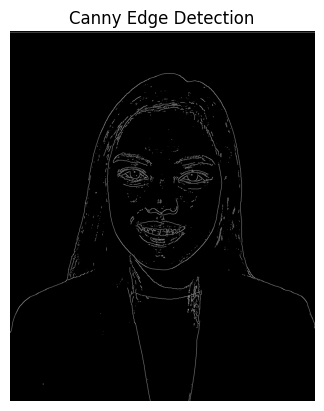

In [20]:
edges = cv2.Canny(image, 50, 50)
display_image (edges, "Canny Edge Detection")